In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam

from keras.utils import to_categorical

Using TensorFlow backend.


In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(labels)

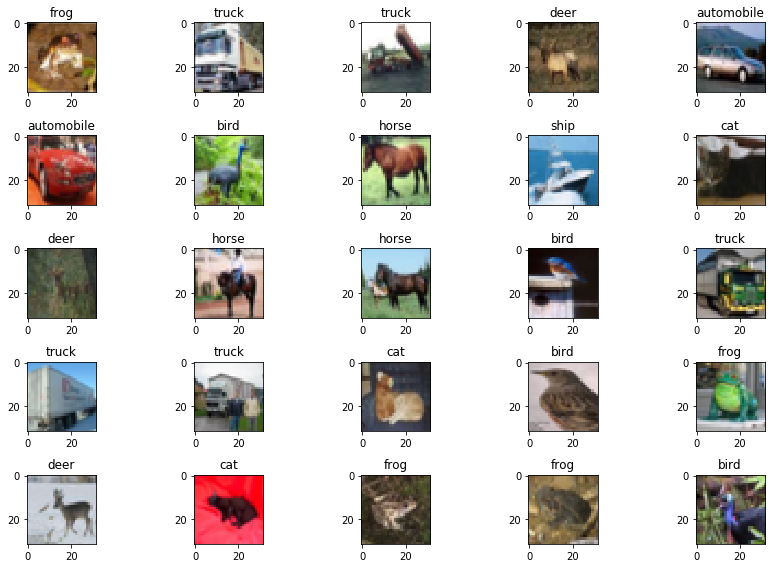

In [17]:
fig, axs = plt.subplots(5,5, figsize=(12,8))
for ax, img, lbl in zip(axs.flatten(), x_train, y_train):
    ax.imshow(img)
    ax.set_title(labels[lbl[0]])
    
fig.tight_layout()

In [18]:
def build_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])
    return model

In [19]:
model = build_model()

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              4719616   
__________

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [22]:
model.fit(x_train[:], y_train[:],
          batch_size=96,
          shuffle=True,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[EarlyStopping(min_delta=0.001, patience=3)])


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s - loss: 1.5860 - acc: 0.4345 - val_loss: 1.3210 - val_acc: 0.5350
Epoch 2/25
50000/50000 [==============================] - 7s - loss: 1.2505 - acc: 0.5590 - val_loss: 1.1728 - val_acc: 0.5908
Epoch 3/25
50000/50000 [==============================] - 7s - loss: 1.0947 - acc: 0.6153 - val_loss: 1.0487 - val_acc: 0.6305
Epoch 4/25
50000/50000 [==============================] - 7s - loss: 0.9895 - acc: 0.6570 - val_loss: 0.9779 - val_acc: 0.6642
Epoch 5/25
50000/50000 [==============================] - 7s - loss: 0.9160 - acc: 0.6842 - val_loss: 0.9427 - val_acc: 0.6710
Epoch 6/25
50000/50000 [==============================] - 7s - loss: 0.8515 - acc: 0.7080 - val_loss: 0.8966 - val_acc: 0.6878
Epoch 7/25
50000/50000 [==============================] - 7s - loss: 0.7963 - acc: 0.7268 - val_loss: 0.8697 - val_acc: 0.6947
Epoch 8/25
50000/50000 [==============================] - 7s 

In [24]:
scores = model.evaluate(x_test, y_test)
print()
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

 9312/10000 [==========================>...] - ETA: 0s
Loss: 0.827
Accuracy: 0.744


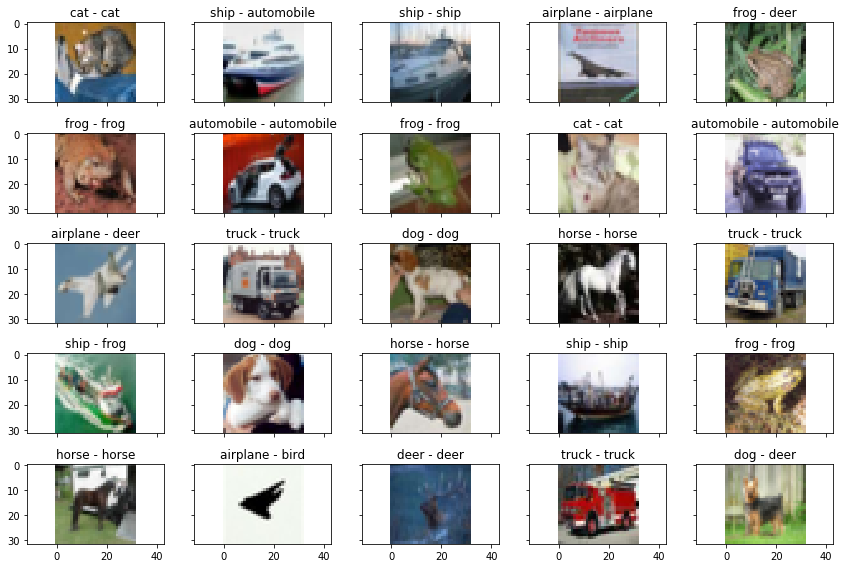

In [25]:
fig, axs = plt.subplots(5,5, sharex=True, sharey=True, figsize=(12,8))
for ax, img, lbl in zip(axs.flatten(), x_test, y_test):
    
    prediction = model.predict(img[np.newaxis, ...])
    
    ax.imshow(img)
    actual = labels[np.argmax(lbl)]
    predicted = labels[np.argmax(prediction)]
    ax.set_title("%s - %s"%(actual, predicted ))
    
fig.tight_layout()
